# Cancer de Mama (Regressão Logística)
- Péricles S. G. Marques
- https://www.linkedin.com/in/periclessavio/

### Objetivo:
Classificar o tipo de cancer (Beanigno ou Maligno)

___

### Carregar a base de dados

In [1]:
import pandas as pd

cancer = pd.read_csv('arquivos/breast_cancer.csv')

### Análise exploratória

##### Visualização

In [2]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##### Tamanho do dataset

In [3]:
cancer.shape

(569, 33)

##### Verificação dados nulos

In [4]:
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

##### Remoção de colunas desnecessárias

In [5]:
cancer.drop(['Unnamed: 32', 'id'],axis=1,inplace=True)

##### Distribuição do diagnóstico de cancer

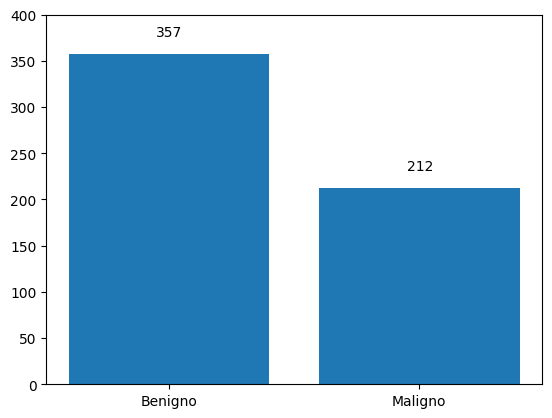

In [6]:
import matplotlib.pyplot as plt

diagnosis = cancer['diagnosis'].value_counts()
bars = ('Benigno', 'Maligno')

plt.bar(bars, diagnosis)
for i, value in enumerate(diagnosis):
    plt.text(i-0.05, value+20, str(value))

plt.ylim([0,400])
plt.show()

### Histogramas

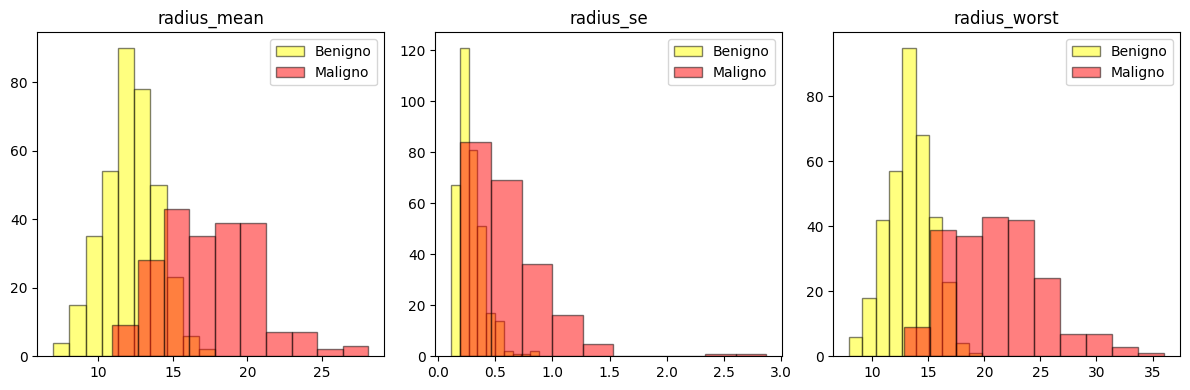

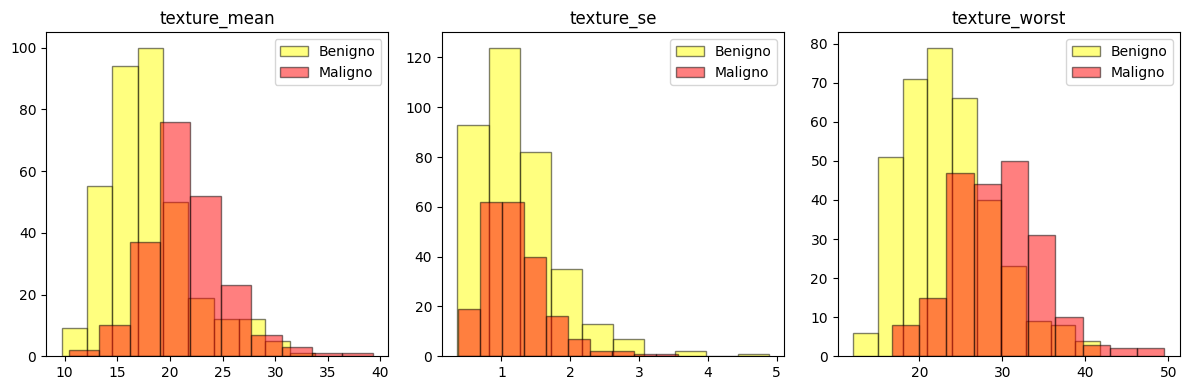

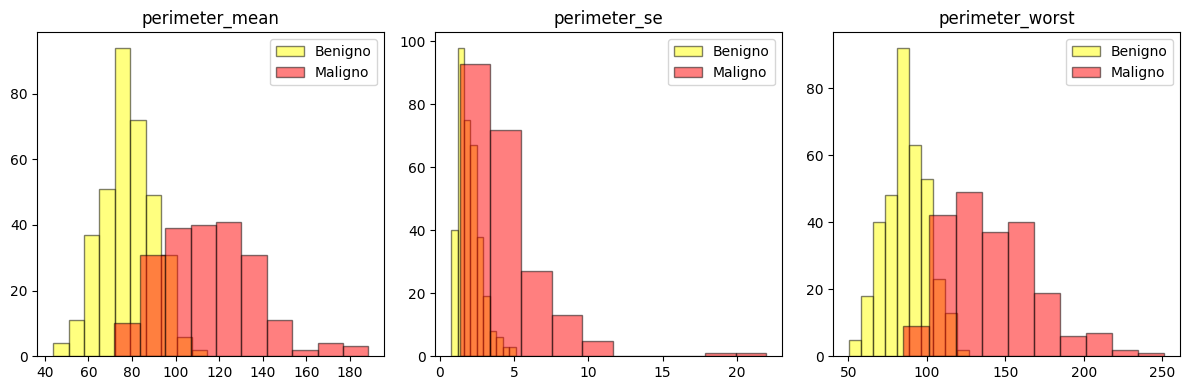

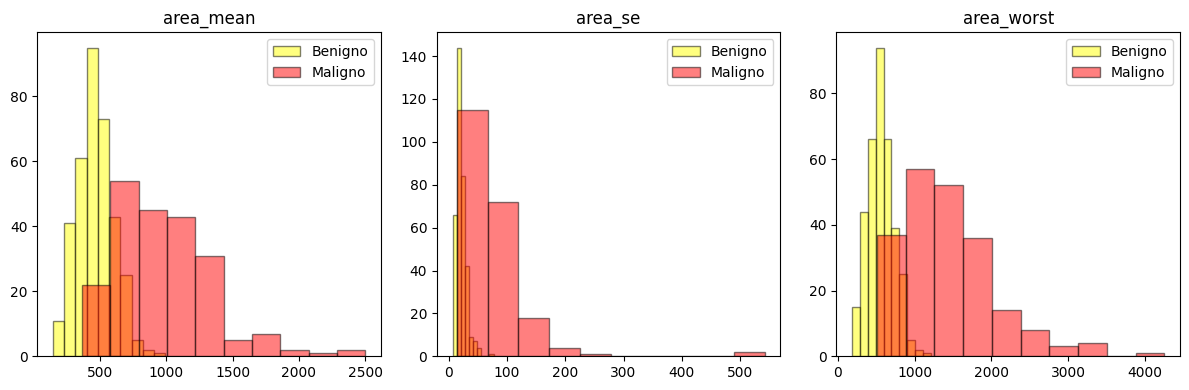

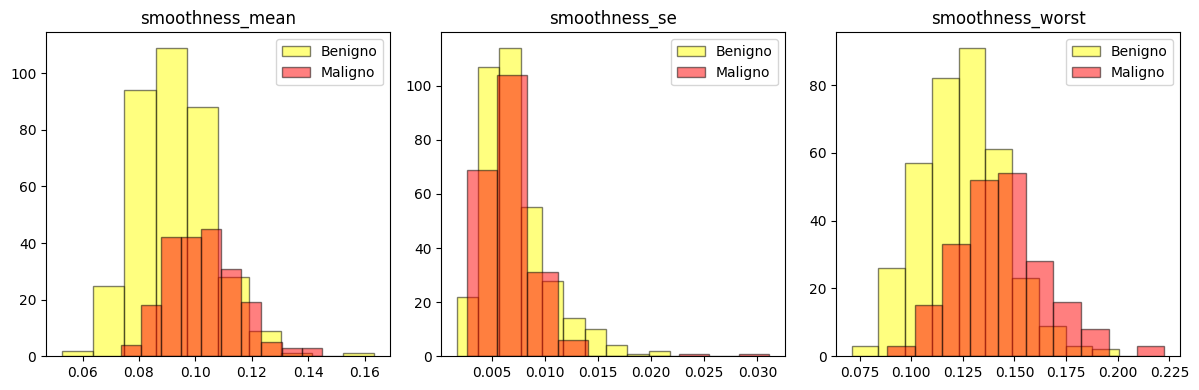

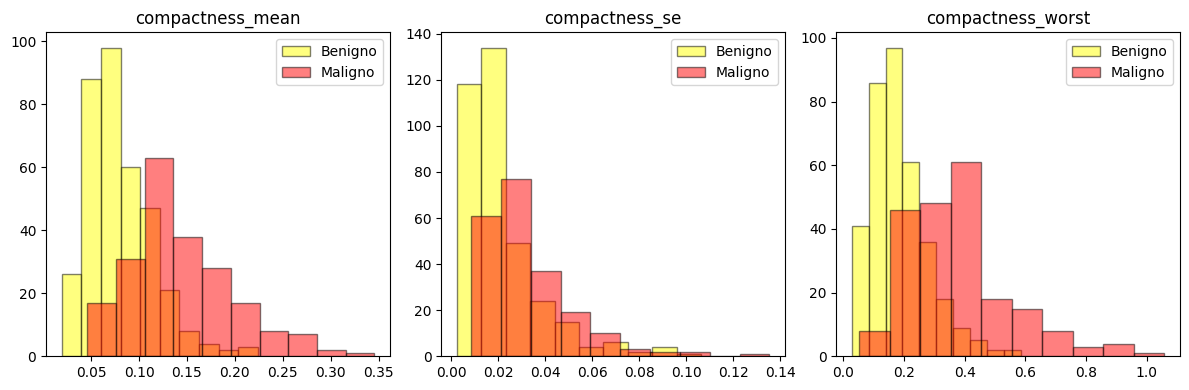

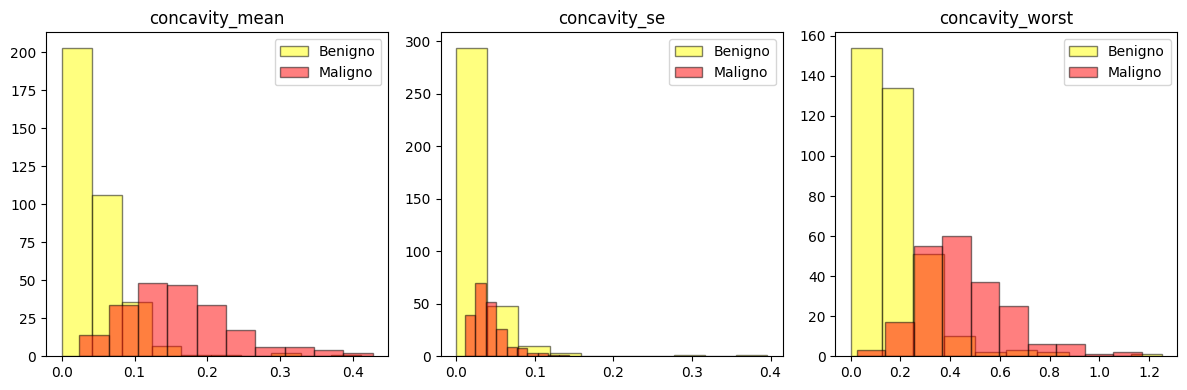

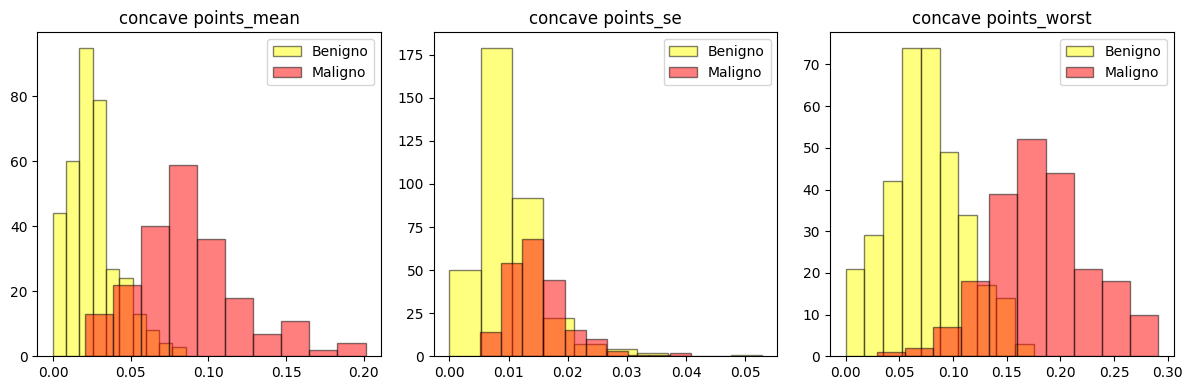

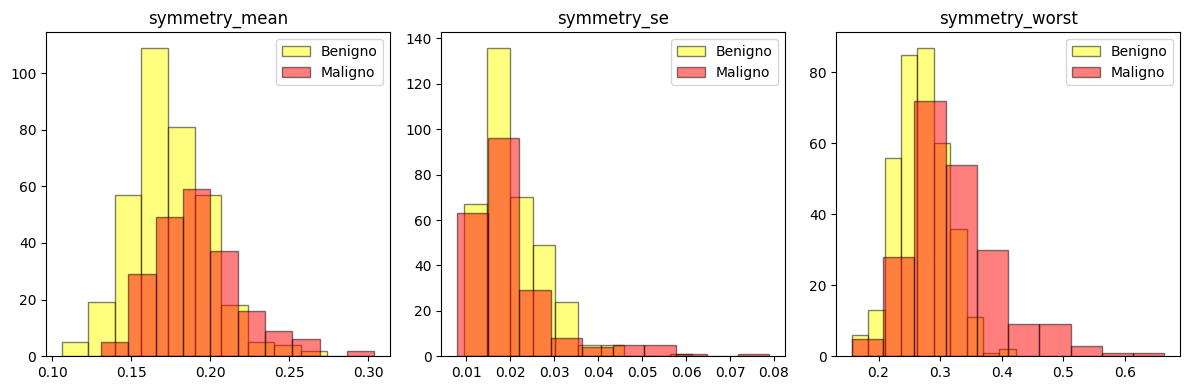

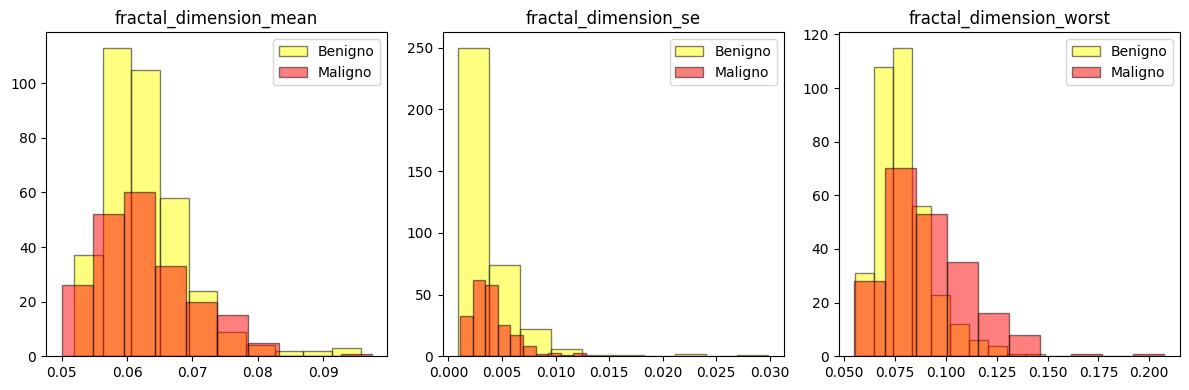

In [7]:
import matplotlib.pyplot as plt

for i in range(0, 10):
    fig, (a0, a1, a2) = plt.subplots(1, 3)
    fig.set_size_inches(12, 4)

    a0.hist(cancer[cancer.columns[1:31][i]][cancer['diagnosis'] == 'B'], label='Benigno', alpha=.5, edgecolor='black', color='yellow')
    a0.hist(cancer[cancer.columns[1:31][i]][cancer['diagnosis'] == 'M'], label="Maligno", alpha=.5, edgecolor='black', color='red')
    a0.set_title(cancer.columns[1:31][i])
    a0.legend()

    a1.hist(cancer[cancer.columns[1:31][i+10]][cancer['diagnosis'] == 'B'], label='Benigno', alpha=.5, edgecolor='black', color='yellow')
    a1.hist(cancer[cancer.columns[1:31][i+10]][cancer['diagnosis'] == 'M'], label="Maligno", alpha=.5, edgecolor='black', color='red')
    a1.set_title(cancer.columns[1:31][i+10])
    a1.legend()

    a2.hist(cancer[cancer.columns[1:31][i+20]][cancer['diagnosis'] == 'B'], label='Benigno', alpha=.5, edgecolor='black', color='yellow')
    a2.hist(cancer[cancer.columns[1:31][i+20]][cancer['diagnosis'] == 'M'], label="Maligno", alpha=.5, edgecolor='black', color='red')
    a2.set_title(cancer.columns[1:31][i+20])
    a2.legend()

    fig.tight_layout()

### Preparação para o modelo

In [8]:
from sklearn.model_selection import train_test_split

X = cancer.drop(['diagnosis'],axis=1)
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Normalização dos dados

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

### Modelo

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print('Acurácia: ' + str(accuracy_score(y_test, y_pred).round(4)))

              precision    recall  f1-score   support

           B       0.99      0.98      0.98       121
           M       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188

Acurácia: 0.9787


### Matrix de confusão

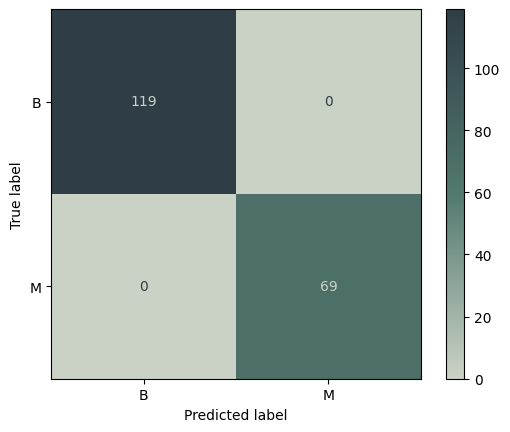

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.colors

mapa_calor = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#CAD2C5","#52796F","#2F3E46"])
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_pred, cmap = mapa_calor)
plt.grid(False)
plt.show()